# Importing Important Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Reading Dataset

In [6]:
data_frame = pd.read_csv("Reliance_data.csv")
data_frame

,Date,Open,High,Low,Close,Volume,Turnover
0,01-01-1996,205.00,206.10,203.65,205.75,3717450,7.630000e+13
1,02-01-1996,205.25,206.25,202.65,204.15,6024650,1.230000e+14
2,03-01-1996,207.50,216.95,205.25,205.70,7473500,1.550000e+14
3,04-01-1996,203.75,204.40,201.05,203.80,7744000,1.570000e+14
4,05-01-1996,203.00,203.00,200.65,202.40,5952000,1.200000e+14
...,...,...,...,...,...,...,...
6200,23-11-2020,1951.00,1970.00,1926.25,1950.70,20918665,4.083700e+15
6201,24-11-2020,1964.00,1974.00,1932.00,1964.05,14277083,2.787040e+15
6202,25-11-2020,1980.00,1992.95,1942.20,1947.80,15062376,2.965870e+15
6203,26-11-2020,1953.05,1965.00,1930.05,1952.60,11924527,2.321310e+15


In [14]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6205 entries, 0 to 6204
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      6205 non-null   object 
 1   Open      6205 non-null   float64
 2   High      6205 non-null   float64
 3   Low       6205 non-null   float64
 4   Close     6205 non-null   float64
 5   Volume    6205 non-null   int64  
 6   Turnover  6205 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 339.5+ KB


In [15]:
data_frame.describe()

,Open,High,Low,Close,Volume,Turnover
count,6205.000000,6205.000000,6205.000000,6205.000000,6.205000e+03,6.205000e+03
mean,866.381176,878.763811,852.795649,865.291289,6.215219e+06,5.187662e+14
std,590.165211,599.625939,578.473998,588.763023,5.479271e+06,7.539147e+14
min,102.600000,105.600000,99.600000,101.300000,5.282000e+04,3.480000e+12
25%,335.000000,340.700000,329.500000,335.350000,3.021751e+06,1.840000e+14
50%,852.500000,862.000000,842.100000,850.700000,4.602904e+06,3.270000e+14
75%,1091.100000,1107.000000,1073.950000,1089.850000,7.304408e+06,5.730000e+14
max,3298.000000,3298.000000,3141.300000,3220.850000,6.523089e+07,1.473430e+16


# Chcking the top 10 values from the dataset

In [7]:
data_frame.head(10)

,Date,Open,High,Low,Close,Volume,Turnover
0,01-01-1996,205.00,206.10,203.65,205.75,3717450,7.630000e+13
1,02-01-1996,205.25,206.25,202.65,204.15,6024650,1.230000e+14
2,03-01-1996,207.50,216.95,205.25,205.70,7473500,1.550000e+14
3,04-01-1996,203.75,204.40,201.05,203.80,7744000,1.570000e+14
4,05-01-1996,203.00,203.00,200.65,202.40,5952000,1.200000e+14
5,08-01-1996,202.00,202.15,192.30,194.30,6675550,1.320000e+14
6,09-01-1996,188.55,192.00,182.25,188.70,13880150,2.580000e+14
7,10-01-1996,185.00,189.45,183.00,183.85,9875700,1.840000e+14
8,11-01-1996,182.00,190.50,181.75,189.60,14625600,2.720000e+14
9,12-01-1996,191.00,192.45,186.35,187.60,13377500,2.530000e+14


# Droping all the NULL values if is there

In [9]:
data_frame.isnull()

,Date,Open,High,Low,Close,Volume,Turnover
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
6200,False,False,False,False,False,False,False
6201,False,False,False,False,False,False,False
6202,False,False,False,False,False,False,False
6203,False,False,False,False,False,False,False


In [10]:
data_frame.dropna(inplace=True)

# Ploting Close Price History using matplotlib

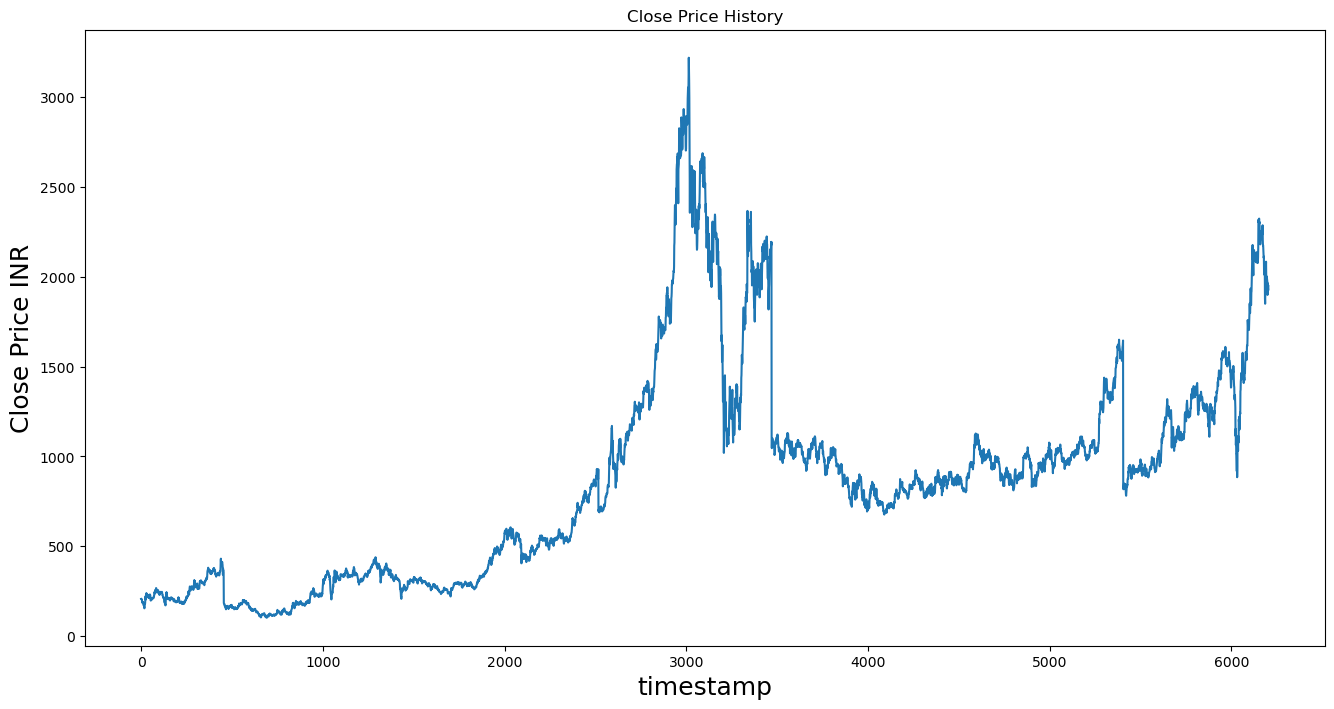

In [11]:
import seaborn as sns
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data_frame['Close'])
#ax=sns.lineplot(data=df, x='timestamp',y='close', color="blue");
plt.xlabel('timestamp',fontsize=18)
plt.ylabel('Close Price INR',fontsize=18)
plt.show()

# Converting data to a numpy array

In [26]:
data = data_frame.filter(['Close'])
dataset = data.values
training_data_len = math.ceil( len(dataset) *.8) 

In [27]:
dataset

array([[ 205.75],
       [ 204.15],
       [ 205.7 ],
       ...,
       [1947.8 ],
       [1952.6 ],
       [1929.8 ]])

# Transforming the dataset array to range between 0 and 1

In [28]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [29]:
train_data = scaled_data[0:training_data_len  , : ]
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

# Spliting data for training and testing

In [30]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [31]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# Building a LSTM Model for Stock Market Prediction

In [32]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Using adam optimizer and mean_squared_error as the loss function

In [33]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [34]:
model.fit(x_train, y_train, batch_size=64, epochs=1)

77/77 [==============================] - 18s 83ms/step - loss: 0.0035


In [35]:
test_data = scaled_data[training_data_len - 60: , : ]#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [36]:
x_test = np.array(x_test)

In [37]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))


In [38]:
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)

39/39 [==============================] - 3s 21ms/step


# Finding the root mean squared error

In [39]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

79.44606239188073

# Plotting the predicted values

C:\Users\Sushmitha\AppData\Local\Temp\ipykernel_8384\642256203.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  display['Predictions'] = predictions#Visualize the data


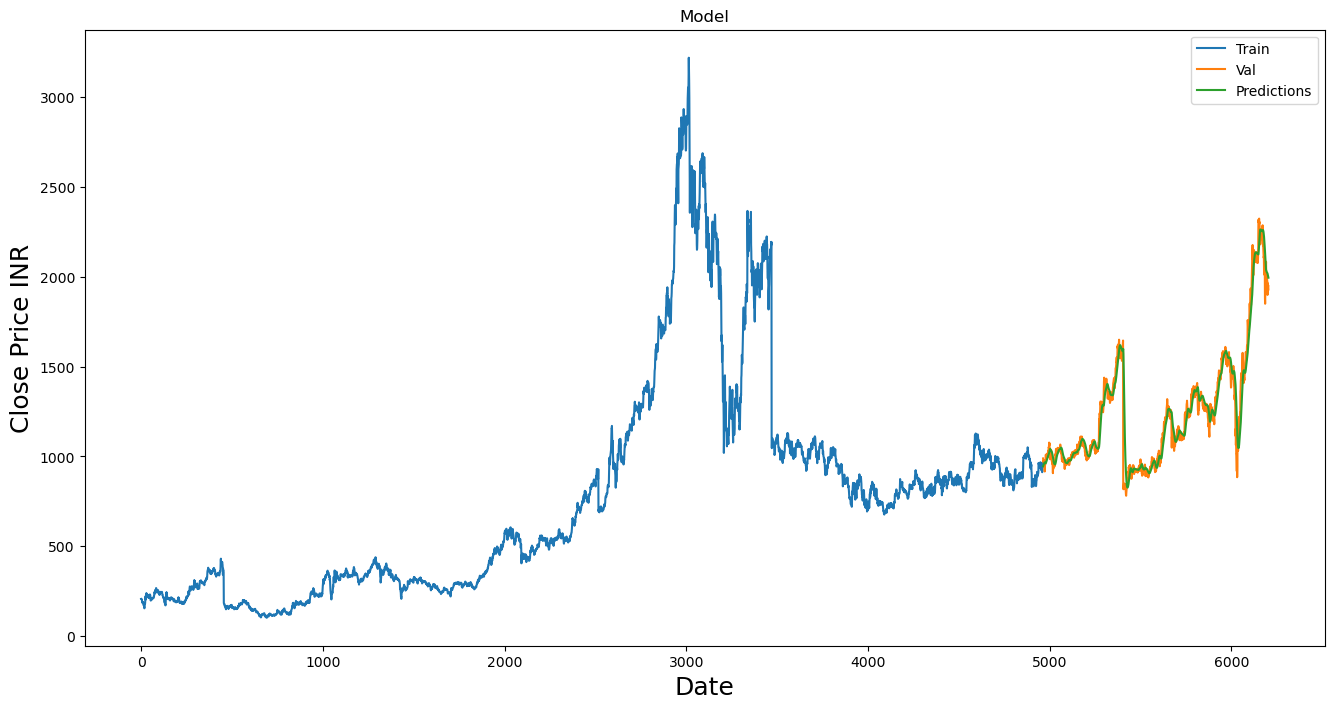

In [41]:
train = data[:training_data_len]
display = data[training_data_len:]
display['Predictions'] = predictions#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.plot(train['Close'])
plt.plot(display['Close'])
plt.plot(display['Predictions'])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()

# It is clear from the graph, the model predicted the close price quiet accurately